# Congestion

_Contexte : Mission analyste réseau_ :

-> Etudes des limitations et définitions de gabarits pour les points de raccordements.

-> Etude de la congestion du réseau et identification des poches.

_Raisons du notebook_ :

-> Analyser les données fournies avec l'appel d'offre fléxibilité exérimental de Perquié (2021)






## Définitions


- Chronique de puissance de dépassement : représentent le surplus de puissance que l'ouvrage ne pourrait transiter. Equivaut à de l'écrêtage d'ENR.

- Chroniques de marges à la réinjection : représentent l’énergie que la batterie peut injecter sur le réseau pour se décharger, entre deux épisodes de contraintes. 

- Sénario 2035 : Elle prend l’hypothèse de 86 MW EnR raccordés. Cette hypothèse tient compte des puissances déjà raccordées à date (74 MW) ainsi que des puissances induites par les projets en cours de développement et qui devraient aboutir d’ici 3 à 5 ans.

- Scénario 2030 : Elle prend l’hypothèse de 147 MW EnR raccordés, soit la puissance prévue à l’horizon S3REnR (2030). C’est cet horizon de temps qui sera pris en compte par RTE pour la définition de la contrainte et du service attendu dans le cadre de l’Appel d’Offres sur la zone de Perquie.

- Perquié : dans les Landes, 100% solaire. Equivaut à une poche d'injection, au moins sur les heures de production solaire. 

- Services de flex attendu : 
> Soutirage d’énergie active, pendant les pics de production photovoltaïque
> Localisation : postes de Barbotan et/ou de Perquié
> Début période d’engagement : ≤ 2025
> Conditions d’activation : à réseau complet
> L’indisponibilité ou la défaillance du service de flexibilité conduirait à des limitations importantes de la production EnR

_Sources :_
1. https://www.services-rte.com/fr/decouvrez-nos-offres-de-services/flexibilites-valorisez-vos-services-pour-la-gestion-des-congestions-reseau.html
2. https://www.services-rte.com/files/live/sites/services-rte/files/pdf/flexibilites/Présentation%20Zones%20RI%20-%202021_01_12.pdf

## Importations de librairies

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Datas

### Chronique de puissance de dépassement – Zone de Perquie 2025
- Chronique de puissance de dépassement – Zone de Perquie 2025
- Chronique de marges à la réinjection - Zone de Perquie 2030 

In [84]:
path_CDC_Perquie_2025 = '/Users/matthiasmolenat/repos/congestion/data/2021-10-25 Chroniques de contraintes - Zone de Perquie 2025.xlsx'
path_CDC_Perquie_2030 = '/Users/matthiasmolenat/repos/congestion/data/2021-10-25 Chroniques de contraintes - Zone de Perquie 2030.xlsx'

In [85]:
df_CDPD_P_25 = pd.read_excel(path_CDC_Perquie_2025)
df_CDPD_P_30 = pd.read_excel(path_CDC_Perquie_2030)
df_CDPD_P_25.tail()


,Mois,Jour,heure,Dépassement année météo 1,Dépassement année météo 2,Dépassement année météo 3,Dépassement année météo 4,Dépassement année météo 5,Dépassement année météo 6,Dépassement année météo 7,Dépassement année météo 8,Dépassement année météo 9,Dépassement année météo 10,Dépassement année météo 11
8731,6,29,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8732,6,29,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8733,6,29,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8734,6,29,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8735,6,29,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
print(df_CDPD_P_25.columns)

Index(['Mois', 'Jour', 'heure', 'Dépassement année météo 1',
       'Dépassement année météo 2', 'Dépassement année météo 3',
       'Dépassement année météo 4', 'Dépassement année météo 5',
       'Dépassement année météo 6', 'Dépassement année météo 7',
       'Dépassement année météo 8', 'Dépassement année météo 9',
       'Dépassement année météo 10', 'Dépassement année météo 11'],
      dtype='object')


### Les chroniques de marges à la réinjection 

- Chronique de marges à la réinjection - Zone de Perquie 2025 
- Chronique de marges à la réinjection - Zone de Perquie 2030

In [87]:
path_MI_Perquie_2025 = '/Users/matthiasmolenat/repos/congestion/data/marges injection 2025 - PV.xlsx'
path_MI_Perquie_2030 = '/Users/matthiasmolenat/repos/congestion/data/marges injection 2025 - PV.xlsx'
Sheet1 = 'Perquie-marge injection'
Sheet2 = 'Barbotan-marge injection'

In [88]:
xls_MI_P_25 = pd.ExcelFile(path_MI_Perquie_2025)
df_MI_P_P_25 = pd.read_excel(xls_MI_P_25, Sheet1)
df_MI_P_B_25 = pd.read_excel(xls_MI_P_25, Sheet2)

xls_MI_P_30 = pd.ExcelFile(path_MI_Perquie_2030)
df_MI_P_P_30 = pd.read_excel(xls_MI_P_30, Sheet1)
df_MI_P_B_30 = pd.read_excel(xls_MI_P_30, Sheet2)

## Exploitation


### 1. On cherche dans le dataframe de Chronique de puissance de dépassement 2025 (resp. 2030)
- le scénario parmi les 11 qui est le plus contraint en moyenne horaire, 
- le scénario parmi les 11 qui est le plus intensémment contraint, lorsque constraint,
- le scénario parmi les 11 qui est le plus souvent contraint.

In [89]:
list_name_scnenario = ['Dépassement année météo 1',
       'Dépassement année météo 2', 'Dépassement année météo 3',
       'Dépassement année météo 4', 'Dépassement année météo 5',
       'Dépassement année météo 6', 'Dépassement année météo 7',
       'Dépassement année météo 8', 'Dépassement année météo 9',
       'Dépassement année météo 10', 'Dépassement année météo 11']


df1 = df_CDPD_P_25[list_name_scnenario]
df2 = df_CDPD_P_25

# df1 = df_CDPD_P_30[list_name_scnenario]
# df2 = df_CDPD_P_30


In [90]:
print('Identifier le scénario parmi les 11 qui est le plus contraint en moyenne horaire :')
df1_mean=df1.mean()
print(df1_mean.idxmax())

Identifier le scénario parmi les 11 qui est le plus contraint en moyenne horaire :
Dépassement année météo 5


In [91]:
print('Identifier le scénario parmi les 11 qui est le plus intensémment contraint, lorsque constraint :')
df1_mean2 = df1.replace(0,np.nan).mean(skipna=True)
print(df1_mean2.idxmax())

Identifier le scénario parmi les 11 qui est le plus intensémment contraint, lorsque constraint :
Dépassement année météo 5


In [92]:
print('Identifier le scénario parmi les 11 qui est le plus souvent contraint :')
df_lim=df1.replace(0,np.nan).count(axis='index')
print(df_lim.idxmax())


Identifier le scénario parmi les 11 qui est le plus souvent contraint :
Dépassement année météo 11


In [93]:
print(df_lim)

Dépassement année météo 1     164
Dépassement année météo 2     155
Dépassement année météo 3     148
Dépassement année météo 4     130
Dépassement année météo 5     176
Dépassement année météo 6     162
Dépassement année météo 7     164
Dépassement année météo 8     113
Dépassement année météo 9     146
Dépassement année météo 10    114
Dépassement année météo 11    179
dtype: int64


Identifier les heures les plus contraintes, scénario par scénario :


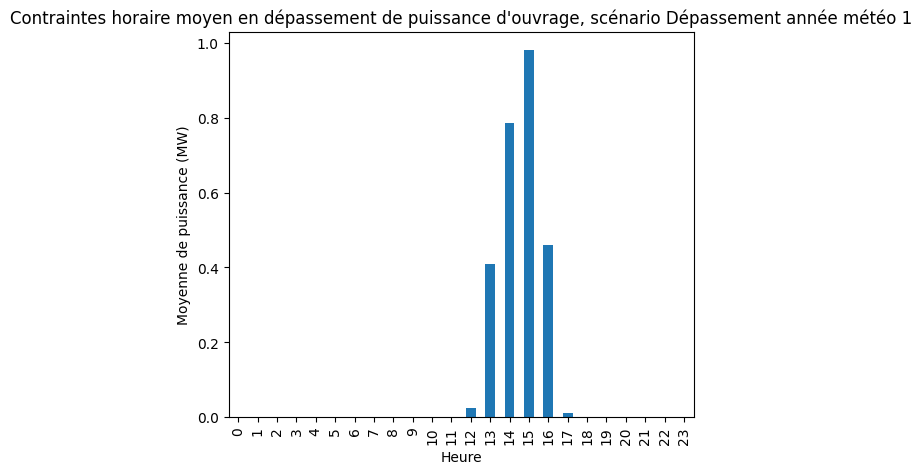

In [94]:
print('Identifier les heures les plus contraintes, scénario par scénario :')

for i,a in enumerate(list_name_scnenario):
    df = df2[['heure',a]].groupby(['heure'])[a].mean()
    plt.figure(i)
    df.plot(kind='bar', title="Contraintes horaire moyen en dépassement de puissance d'ouvrage, scénario " + a, ylabel='Moyenne de puissance (MW)',
         xlabel='Heure', figsize=(6, 5))
    break #a commenter pour avoir tous les scénarios

<Axes: title={'center': "Contraintes en dépassement de puissance d'ouvrage, moyenne sur tous les scénarios"}, xlabel='Heure', ylabel='Moyenne de puissance (MW)'>

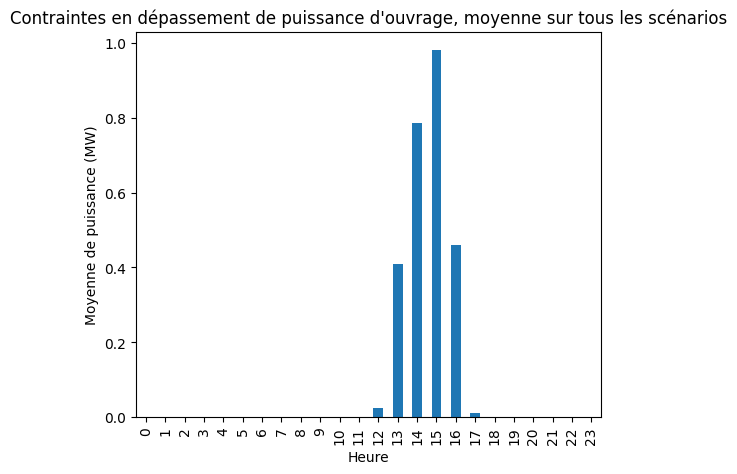

In [95]:
# Moyenne sur tous les scénarios
h_scen = ['heure']+list_name_scnenario
df3 = df2[h_scen].groupby('heure').mean().mean(axis=1)

df.plot(kind='bar', title="Contraintes en dépassement de puissance d'ouvrage, moyenne sur tous les scénarios", ylabel='Moyenne de puissance (MW)', xlabel='Heure', figsize=(6, 5))


### 2. Chronique de marge à la réinjection 2025 (resp. 2030)


In [96]:
list_name_scnenario = ['année 1', 'année 2', 'année 3', 'année 4',
       'année 5', 'année 6', 'année 7', 'année 8', 'année 9', 'année 10',
       'année 11']

df1 = df_MI_P_P_30[list_name_scnenario]
df2 = df_MI_P_P_30

Identifier les heures les plus restreintes, scénario par scénario :


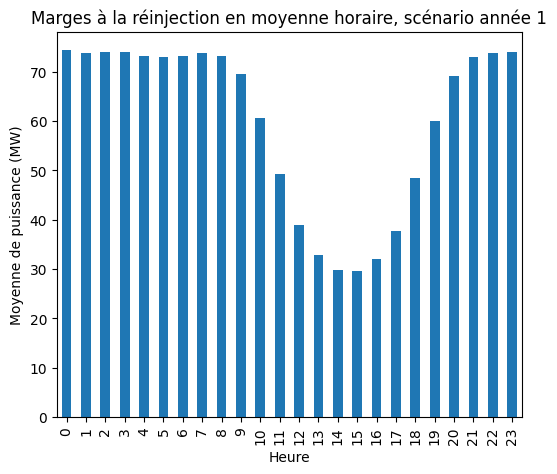

In [82]:
print('Identifier les heures les plus restreintes, scénario par scénario :')

for i,a in enumerate(list_name_scnenario):
    df = df2[['heure',a]].groupby(['heure'])[a].mean()
    plt.figure(i)
    df.plot(kind='bar', title="Marges à la réinjection en moyenne horaire, scénario " + a, ylabel='Moyenne de puissance (MW)',
         xlabel='Heure', figsize=(6, 5))
    break #a commenter pour avoir tous les scénarios    
    

Identifier les heures les plus contraintes, scénario par scénario :


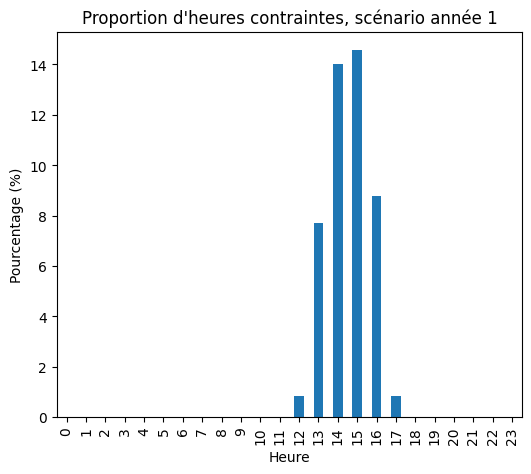

In [53]:
print('Identifier les heures les plus contraintes, scénario par scénario :')

(row, col) = df2.shape

for i,a in enumerate(list_name_scnenario):
    df = df2[['heure',a]].groupby(['heure'])[a].agg(lambda x: (x == 0).sum())*24*100/(row)
    plt.figure(i)
    df.plot(kind='bar', title="Proportion d'heures contraintes, scénario " + a, ylabel='Pourcentage (%)',
        xlabel='Heure', figsize=(6, 5))
    break #a commenter pour avoir tous les scénarios
    
    

## Commentaires et remarques

1. CDPD2025 vs. CDPD2030 :
Projection de valeurs plus intenses (odg 1 vs. 20) et plus étendues (12-17 vs. 11-18) : résultats d'une hypothèse d'injection importante dans le réseau par les ENRs solaires.
2.  La procédure d’attribution de l’AO a été menée à terme et le contrat avec le lauréat désigné EDF Renouvelables est finalement entré en vigueur le 23/09/2024. (https://www.services-rte.com/fr/actualites/flexibilites-signature-d-un-contrat-pour-la-levée-de-congestion-reseau.html)